# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 조명용품

In [10]:
# 조명용품만 남기기
ap_light = df_ap_quarter[df_ap_quarter.업종명 == '조명용품'].reset_index().drop('index', axis=1)
ap_light

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,소매,가구/인테리어,조명용품,압구정동,733182454,11,0,1
1,2017-2,소매,가구/인테리어,조명용품,압구정동,1055050694,11,0,0
2,2017-3,소매,가구/인테리어,조명용품,압구정동,1111394585,11,0,0
3,2017-4,소매,가구/인테리어,조명용품,압구정동,1446683718,11,0,0
4,2018-1,소매,가구/인테리어,조명용품,압구정동,949510882,10,0,1
5,2018-2,소매,가구/인테리어,조명용품,압구정동,1000761802,10,0,0
6,2018-3,소매,가구/인테리어,조명용품,압구정동,1580207968,9,0,1
7,2018-4,소매,가구/인테리어,조명용품,압구정동,749558563,9,0,0
8,2019-4,소매,가구/인테리어,조명용품,압구정동,764602890,9,0,0
9,2020-1,소매,가구/인테리어,조명용품,압구정동,1046649029,8,0,0


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [11]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_light['성장성'] = ap_light['분기당_매출_금액'] / ap_light['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_light['성장성'][0] = 1

ap_light

<ipython-input-11-ac5d157453e8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_light['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,소매,가구/인테리어,조명용품,압구정동,733182454,11,0,1,1.000000
1,2017-2,소매,가구/인테리어,조명용품,압구정동,1055050694,11,0,0,1.439002
2,2017-3,소매,가구/인테리어,조명용품,압구정동,1111394585,11,0,0,1.053404
3,2017-4,소매,가구/인테리어,조명용품,압구정동,1446683718,11,0,0,1.301683
4,2018-1,소매,가구/인테리어,조명용품,압구정동,949510882,10,0,1,0.656336
5,2018-2,소매,가구/인테리어,조명용품,압구정동,1000761802,10,0,0,1.053976
6,2018-3,소매,가구/인테리어,조명용품,압구정동,1580207968,9,0,1,1.579005
7,2018-4,소매,가구/인테리어,조명용품,압구정동,749558563,9,0,0,0.474342
8,2019-4,소매,가구/인테리어,조명용품,압구정동,764602890,9,0,0,1.020071
9,2020-1,소매,가구/인테리어,조명용품,압구정동,1046649029,8,0,0,1.368879


In [12]:
# 개업률, 폐업률, 순점포증감률 추가

ap_light['개업률'] = (ap_light['개업점포수'] / ap_light['총 점포수']) * 100
ap_light['폐업률'] = (ap_light['폐업점포수'] / ap_light['총 점포수']) * 100
ap_light['순점포증감률'] = ((ap_light['개업점포수'] - ap_light['폐업점포수']) / ap_light['총 점포수']) * 100

ap_light

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,소매,가구/인테리어,조명용품,압구정동,733182454,11,0,1,1.000000,0.000000,9.090909,-9.090909
1,2017-2,소매,가구/인테리어,조명용품,압구정동,1055050694,11,0,0,1.439002,0.000000,0.000000,0.000000
2,2017-3,소매,가구/인테리어,조명용품,압구정동,1111394585,11,0,0,1.053404,0.000000,0.000000,0.000000
3,2017-4,소매,가구/인테리어,조명용품,압구정동,1446683718,11,0,0,1.301683,0.000000,0.000000,0.000000
4,2018-1,소매,가구/인테리어,조명용품,압구정동,949510882,10,0,1,0.656336,0.000000,10.000000,-10.000000
5,2018-2,소매,가구/인테리어,조명용품,압구정동,1000761802,10,0,0,1.053976,0.000000,0.000000,0.000000
6,2018-3,소매,가구/인테리어,조명용품,압구정동,1580207968,9,0,1,1.579005,0.000000,11.111111,-11.111111
7,2018-4,소매,가구/인테리어,조명용품,압구정동,749558563,9,0,0,0.474342,0.000000,0.000000,0.000000
8,2019-4,소매,가구/인테리어,조명용품,압구정동,764602890,9,0,0,1.020071,0.000000,0.000000,0.000000
9,2020-1,소매,가구/인테리어,조명용품,압구정동,1046649029,8,0,0,1.368879,0.000000,0.000000,0.000000


In [13]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 조명용품만 남기기
gangnam_light = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '조명용품'].reset_index()

################################################################################################################################################################################################

ap_light['시장성'] = (ap_light['분기당_매출_금액'] / ap_light['총 점포수']) - (gangnam_light['분기당_매출_금액'] / gangnam_light['총 점포수'])

ap_light = ap_light[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_light

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,조명용품,733182454,1.000000,-9.090909,2.663235e+07
1,2017-2,조명용품,1055050694,1.439002,0.000000,5.514636e+07
2,2017-3,조명용품,1111394585,1.053404,0.000000,5.914295e+07
3,2017-4,조명용품,1446683718,1.301683,0.000000,8.639841e+07
4,2018-1,조명용품,949510882,0.656336,-10.000000,5.227863e+07
5,2018-2,조명용품,1000761802,1.053976,0.000000,4.978807e+07
6,2018-3,조명용품,1580207968,1.579005,-11.111111,1.271415e+08
7,2018-4,조명용품,749558563,0.474342,0.000000,4.037139e+07
8,2019-4,조명용품,764602890,1.020071,0.000000,5.799608e+07
9,2020-1,조명용품,1046649029,1.368879,0.000000,9.787407e+07


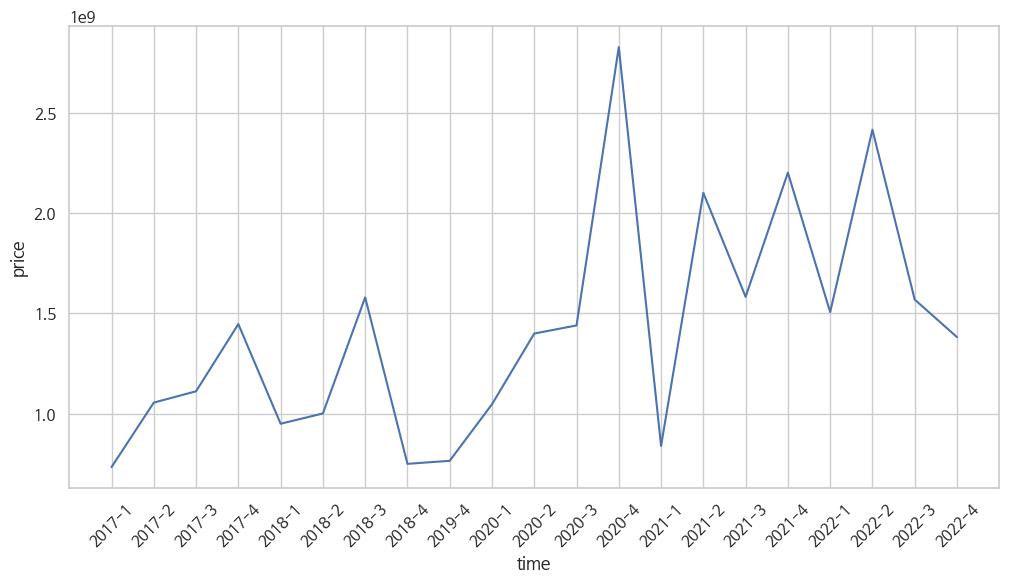

In [14]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_light['분기'], y=ap_light['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [15]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_light[['성장성', '시장성', '순점포증감률']]
y = ap_light.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000  2.663235e+07  -9.090909
1   1.439002  5.514636e+07   0.000000
2   1.053404  5.914295e+07   0.000000
3   1.301683  8.639841e+07   0.000000
4   0.656336  5.227863e+07 -10.000000
5   1.053976  4.978807e+07   0.000000
6   1.579005  1.271415e+08 -11.111111
7   0.474342  4.037139e+07   0.000000
8   1.020071  5.799608e+07   0.000000
9   1.368879  9.787407e+07   0.000000
10  1.337226  1.326238e+08  11.111111
11  1.028854  3.195977e+07 -11.111111
12  1.964427  2.474171e+08   0.000000
13  0.296509  7.510066e+06   0.000000
14  2.505538  1.610440e+08   0.000000
15  0.753123 -4.234082e+06   0.000000
16  1.391649  1.759828e+08   0.000000
17  0.684058  1.132224e+07   0.000000
18  1.604061  1.238093e+08   0.000000
19  0.649218  3.577008e+07   0.000000
20  0.880703  4.263063e+07   0.000000
--------------------------------------------------------------------------------
     분기당_매출_금액
0    733182454
1   1055050694
2   1111394585
3   1446683718
4    949

In [16]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (21, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (21, 1)


In [17]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [18]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (19, 1)


In [19]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.15966709 0.15896668 0.5       ]
 [0.26445721 0.18622884 0.5       ]]


In [20]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (15, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (15, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (15, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (15, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [21]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [22]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1549
Epoch 1: val_loss improved from inf to 0.28443, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1549 - val_loss: 0.2844
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1487
Epoch 2: val_loss improved from 0.28443 to 0.27361, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.1487 - val_loss: 0.2736
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1428
Epoch 3: val_loss improved from 0.27361 to 0.26314, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.1428 - val_loss: 0.2631
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1371
Epoch 4: val_loss improved from 0.26314 to 0.25298, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.1371 - val_loss: 0.2530
Epoch 5/100
1/1 [=================

In [23]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.34998542]
 [0.38198748]
 [0.34937668]
 [0.3801232 ]]


In [24]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.369114,0.349985
2022-2,0.803425,0.381987
2022-3,0.398869,0.349377
2022-4,0.309546,0.380123


In [25]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_light의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.369114,0.349985,1506687235,1.466603e+09,40084483.0
2022-2,0.803425,0.381987,2416818290,1.533666e+09,883152754.0
2022-3,0.398869,0.349377,1569042578,1.465327e+09,103715474.0
2022-4,0.309546,0.380123,1381859992,1.529759e+09,-147898728.0


In [26]:
df_test = df_test.reset_index()

### 결과

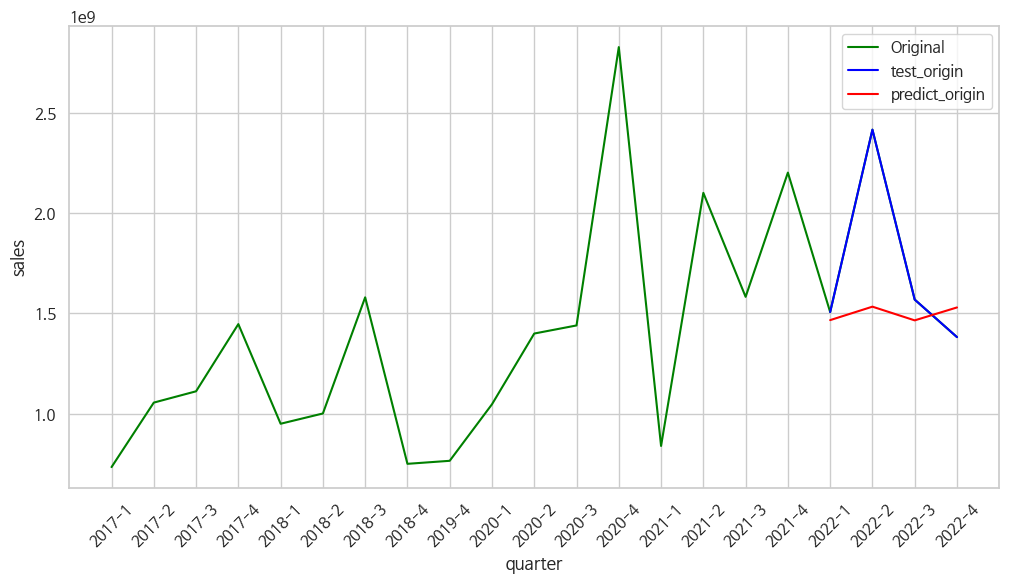

In [27]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [28]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.197635e+08
std      4.549771e+08
min     -1.478987e+08
25%     -6.911320e+06
50%      7.189998e+07
75%      2.985748e+08
max      8.831528e+08
dtype: float64

In [29]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 37ms/step
[[0.33081028]]
--------------------------------------------------------------------------------
예측된 매출  : 1426419968.0 


## 23년 1분기 성장성 예측

In [30]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_light[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_light.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성     순점포증감률
0    733182454  2.663235e+07  -9.090909
1   1055050694  5.514636e+07   0.000000
2   1111394585  5.914295e+07   0.000000
3   1446683718  8.639841e+07   0.000000
4    949510882  5.227863e+07 -10.000000
5   1000761802  4.978807e+07   0.000000
6   1580207968  1.271415e+08 -11.111111
7    749558563  4.037139e+07   0.000000
8    764602890  5.799608e+07   0.000000
9   1046649029  9.787407e+07   0.000000
10  1399606419  1.326238e+08  11.111111
11  1439990550  3.195977e+07 -11.111111
12  2828756530  2.474171e+08   0.000000
13   838751967  7.510066e+06   0.000000
14  2101524839  1.610440e+08   0.000000
15  1582705798 -4.234082e+06   0.000000
16  2202571373  1.759828e+08   0.000000
17  1506687235  1.132224e+07   0.000000
18  2416818290  1.238093e+08   0.000000
19  1569042578  3.577008e+07   0.000000
20  1381859992  4.263063e+07   0.000000
--------------------------------------------------------------------------------
         성장성
0   1.000000
1   1.439002


In [31]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (21, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (21, 1)


In [32]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (19, 1)


In [33]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.39886928 0.15896668 0.5       ]
 [0.30954646 0.18622884 0.5       ]]


In [34]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (15, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (15, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (15, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (15, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [35]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2013
Epoch 1: val_loss improved from inf to 0.33645, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2013 - val_loss: 0.3364
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1934
Epoch 2: val_loss improved from 0.33645 to 0.32610, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.1934 - val_loss: 0.3261
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1857
Epoch 3: val_loss improved from 0.32610 to 0.31605, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.1857 - val_loss: 0.3160
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1782
Epoch 4: val_loss improved from 0.31605 to 0.30625, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.1782 - val_loss: 0.3063
Epoch 5/100
1/1 [================

In [37]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 816ms/step
[[0.4738956 ]
 [0.52302766]
 [0.4715231 ]
 [0.51853544]]


In [38]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.175439,0.473896
2022-2,0.591913,0.523028
2022-3,0.159667,0.471523
2022-4,0.264457,0.518535


In [39]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 3].values       # 성장성이 ap_light의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.175439,0.473896,0.684058,1.343358,-0.659300
2022-2,0.591913,0.523028,1.604061,1.451892,0.152169
2022-3,0.159667,0.471523,0.649218,1.338117,-0.688899
2022-4,0.264457,0.518535,0.880703,1.441969,-0.561266


### 결과

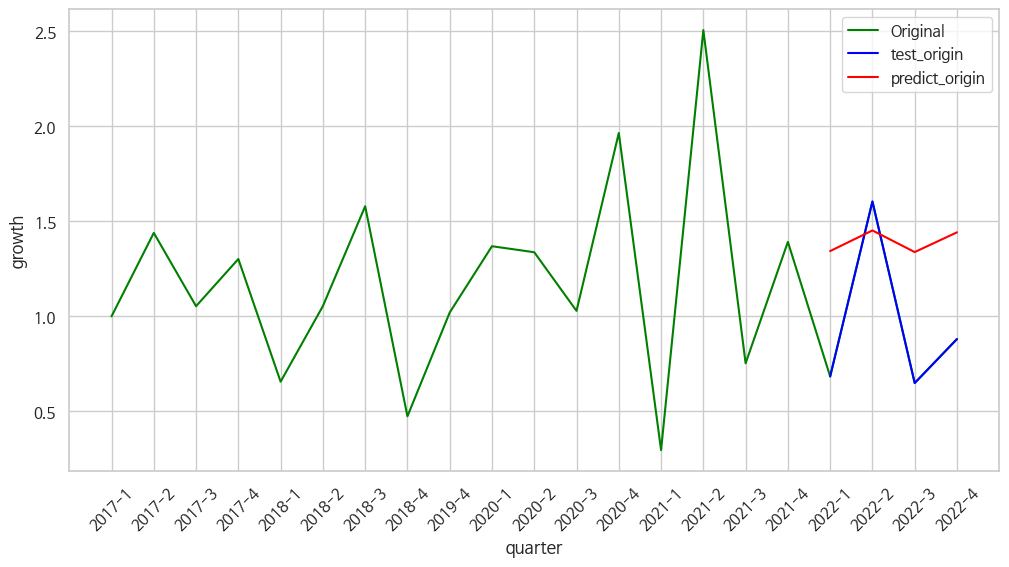

In [40]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [41]:
## error의 요약 통계량
error.describe()

count    4.000000
mean    -0.439324
std      0.398083
min     -0.688899
25%     -0.666700
50%     -0.610283
75%     -0.382907
max      0.152169
dtype: float64

In [42]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 33ms/step
[[0.44665945]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.2831926345825195 


## 23년 1분기 시장성 예측

In [43]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_light[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_light.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액     순점포증감률
0   1.000000   733182454  -9.090909
1   1.439002  1055050694   0.000000
2   1.053404  1111394585   0.000000
3   1.301683  1446683718   0.000000
4   0.656336   949510882 -10.000000
5   1.053976  1000761802   0.000000
6   1.579005  1580207968 -11.111111
7   0.474342   749558563   0.000000
8   1.020071   764602890   0.000000
9   1.368879  1046649029   0.000000
10  1.337226  1399606419  11.111111
11  1.028854  1439990550 -11.111111
12  1.964427  2828756530   0.000000
13  0.296509   838751967   0.000000
14  2.505538  2101524839   0.000000
15  0.753123  1582705798   0.000000
16  1.391649  2202571373   0.000000
17  0.684058  1506687235   0.000000
18  1.604061  2416818290   0.000000
19  0.649218  1569042578   0.000000
20  0.880703  1381859992   0.000000
--------------------------------------------------------------------------------
             시장성
0   2.663235e+07
1   5.514636e+07
2   5.914295e+07
3   8.639841e+07
4   5.227863e+07
5   4.978807e+07
6   1.27

In [44]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (21, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (21, 1)


In [45]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (19, 1)


In [46]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.15966709 0.39886928 0.5       ]
 [0.26445721 0.30954646 0.5       ]]


In [47]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (15, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (15, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (15, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (15, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [48]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2053
Epoch 1: val_loss improved from inf to 0.25066, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2053 - val_loss: 0.2507
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1977
Epoch 2: val_loss improved from 0.25066 to 0.24183, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.1977 - val_loss: 0.2418
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1903
Epoch 3: val_loss improved from 0.24183 to 0.23331, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.1903 - val_loss: 0.2333
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1831
Epoch 4: val_loss improved from 0.23331 to 0.22506, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.1831 - val_loss: 0.2251
Epoch 5/100
1/1 [=================

In [50]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 854ms/step
[[0.3854408 ]
 [0.40319464]
 [0.38794863]
 [0.41703945]]


In [51]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.061817,0.385441
2022-2,0.508813,0.403195
2022-3,0.158967,0.387949
2022-4,0.186229,0.417039


In [52]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 5].values       # 시장성이 ap_light의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.061817,0.385441,1.132224e+07,92762568.0,-8.144032e+07
2022-2,0.508813,0.403195,1.238093e+08,97230344.0,2.657893e+07
2022-3,0.158967,0.387949,3.577008e+07,93393672.0,-5.762359e+07
2022-4,0.186229,0.417039,4.263063e+07,100714408.0,-5.808377e+07


### 결과

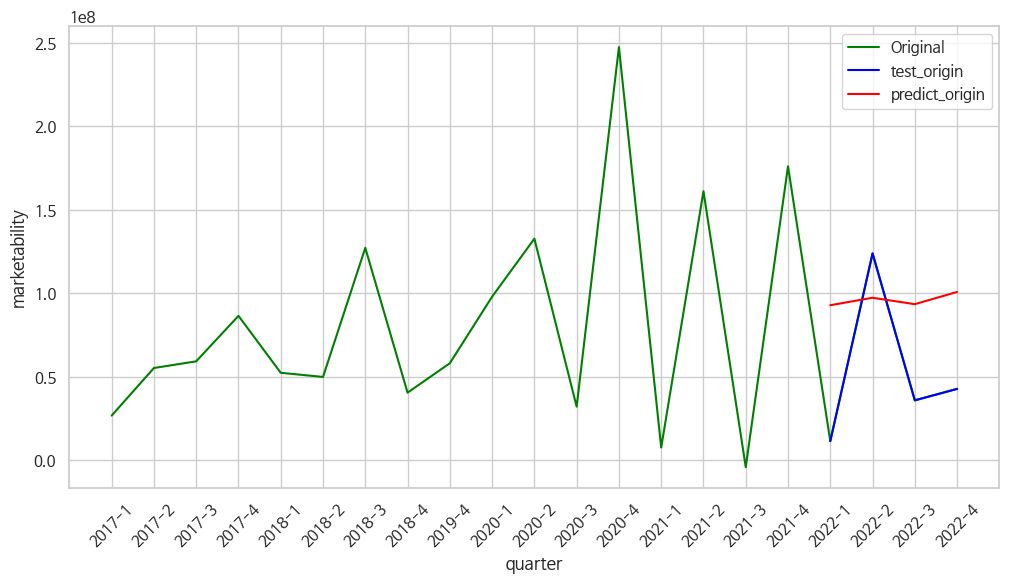

In [53]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [54]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -4.264219e+07
std      4.746839e+07
min     -8.144032e+07
25%     -6.392291e+07
50%     -5.785368e+07
75%     -3.657296e+07
max      2.657893e+07
dtype: float64

In [55]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.35995817]]
--------------------------------------------------------------------------------
예측된 시장성  : 86349832.0 


## 23년 1분기 순점포증감률 예측

In [56]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_light[['성장성', '분기당_매출_금액', '시장성']]
y = ap_light.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000   733182454  2.663235e+07
1   1.439002  1055050694  5.514636e+07
2   1.053404  1111394585  5.914295e+07
3   1.301683  1446683718  8.639841e+07
4   0.656336   949510882  5.227863e+07
5   1.053976  1000761802  4.978807e+07
6   1.579005  1580207968  1.271415e+08
7   0.474342   749558563  4.037139e+07
8   1.020071   764602890  5.799608e+07
9   1.368879  1046649029  9.787407e+07
10  1.337226  1399606419  1.326238e+08
11  1.028854  1439990550  3.195977e+07
12  1.964427  2828756530  2.474171e+08
13  0.296509   838751967  7.510066e+06
14  2.505538  2101524839  1.610440e+08
15  0.753123  1582705798 -4.234082e+06
16  1.391649  2202571373  1.759828e+08
17  0.684058  1506687235  1.132224e+07
18  1.604061  2416818290  1.238093e+08
19  0.649218  1569042578  3.577008e+07
20  0.880703  1381859992  4.263063e+07
--------------------------------------------------------------------------------
       순점포증감률
0   -9.090909
1    0.000000
2    0.000000
3    

In [57]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (21, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (21, 1)


In [58]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (19, 1)


In [59]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.15966709 0.39886928 0.15896668]
 [0.26445721 0.30954646 0.18622884]]


In [60]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (15, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (15, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (15, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (15, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [61]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2607
Epoch 1: val_loss improved from inf to 0.26674, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2607 - val_loss: 0.2667
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2530
Epoch 2: val_loss improved from 0.26674 to 0.25503, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2530 - val_loss: 0.2550
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2456
Epoch 3: val_loss improved from 0.25503 to 0.24370, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2456 - val_loss: 0.2437
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2384
Epoch 4: val_loss improved from 0.24370 to 0.23269, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2384 - val_loss: 0.2327
Epoch 5/100
1/1 [=================

In [63]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 823ms/step
[[0.3889895 ]
 [0.4792201 ]
 [0.38565257]
 [0.4762592 ]]


In [64]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.5,0.388990
2022-2,0.5,0.479220
2022-3,0.5,0.385653
2022-4,0.5,0.476259


In [65]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_light의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.5,0.388990,0.0,-2.466900,2.466900
2022-2,0.5,0.479220,0.0,-0.461776,0.461776
2022-3,0.5,0.385653,0.0,-2.541054,2.541054
2022-4,0.5,0.476259,0.0,-0.527573,0.527573


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


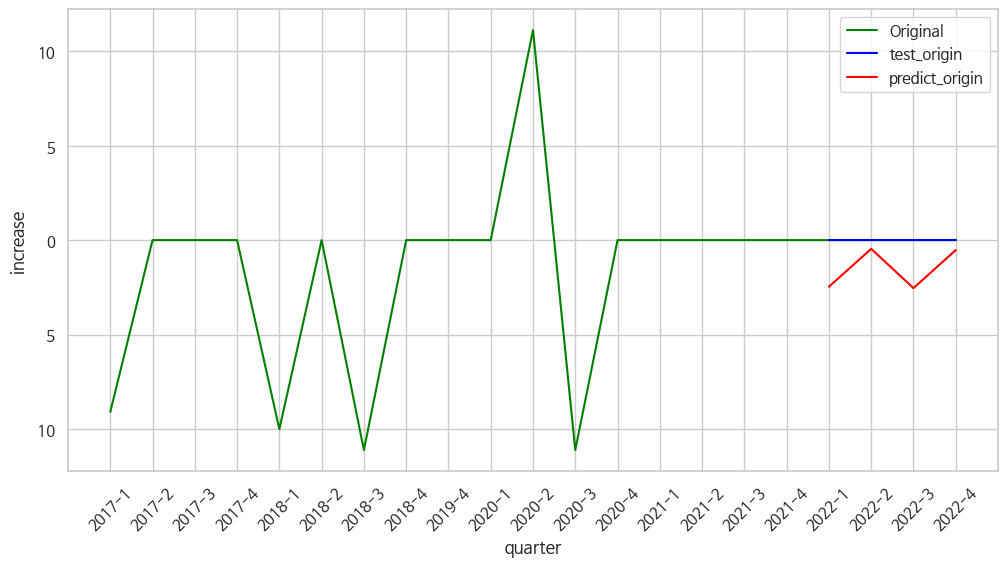

In [66]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [67]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.499326
std      1.160777
min      0.461776
25%      0.511124
50%      1.497237
75%      2.485438
max      2.541054
dtype: float64

In [68]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 22ms/step
[[0.33456165]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -3.676407814025879 


## 원본 데이터에 예측값 추가하기

In [69]:
print(sales)
print(growth)
print(marketability)
print(increase)

1426420000.0
1.2831926
86349830.0
-3.6764078


In [70]:
ap_light.loc[24] = ['2023-1', '조명용품', sales, growth, increase, marketability]

<ipython-input-70-e4efb8434236>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_light.loc[24] = ['2023-1', '조명용품', sales, growth, increase, marketability]


In [71]:
ap_light

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,조명용품,7.331825e+08,1.000000,-9.090909,2.663235e+07
1,2017-2,조명용품,1.055051e+09,1.439002,0.000000,5.514636e+07
2,2017-3,조명용품,1.111395e+09,1.053404,0.000000,5.914295e+07
3,2017-4,조명용품,1.446684e+09,1.301683,0.000000,8.639841e+07
4,2018-1,조명용품,9.495109e+08,0.656336,-10.000000,5.227863e+07
5,2018-2,조명용품,1.000762e+09,1.053976,0.000000,4.978807e+07
6,2018-3,조명용품,1.580208e+09,1.579005,-11.111111,1.271415e+08
7,2018-4,조명용품,7.495586e+08,0.474342,0.000000,4.037139e+07
8,2019-4,조명용품,7.646029e+08,1.020071,0.000000,5.799608e+07
9,2020-1,조명용품,1.046649e+09,1.368879,0.000000,9.787407e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [72]:
### X / y 데이터 생성
X = ap_light[['성장성', '시장성', '순점포증감률']]
y = ap_light.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000  2.663235e+07  -9.090909
1   1.439002  5.514636e+07   0.000000
2   1.053404  5.914295e+07   0.000000
3   1.301683  8.639841e+07   0.000000
4   0.656336  5.227863e+07 -10.000000
5   1.053976  4.978807e+07   0.000000
6   1.579005  1.271415e+08 -11.111111
7   0.474342  4.037139e+07   0.000000
8   1.020071  5.799608e+07   0.000000
9   1.368879  9.787407e+07   0.000000
10  1.337226  1.326238e+08  11.111111
11  1.028854  3.195977e+07 -11.111111
12  1.964427  2.474171e+08   0.000000
13  0.296509  7.510066e+06   0.000000
14  2.505538  1.610440e+08   0.000000
15  0.753123 -4.234082e+06   0.000000
16  1.391649  1.759828e+08   0.000000
17  0.684058  1.132224e+07   0.000000
18  1.604061  1.238093e+08   0.000000
19  0.649218  3.577008e+07   0.000000
20  0.880703  4.263063e+07   0.000000
24  1.283193  8.634983e+07  -3.676408
--------------------------------------------------------------------------------
       분기당_매출_금액
0   7.331825e+08
1   1.05505

In [73]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (22, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (22, 1)


In [74]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (20, 1)
[[0.26445721 0.18622884 0.5       ]
 [0.44665943 0.35995816 0.33456165]]


In [75]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (16, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (16, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (16, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (16, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [76]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [77]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1424
Epoch 1: val_loss improved from inf to 0.31906, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.1424 - val_loss: 0.3191
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1367
Epoch 2: val_loss improved from 0.31906 to 0.30661, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.1367 - val_loss: 0.3066
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1311
Epoch 3: val_loss improved from 0.30661 to 0.29453, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.1311 - val_loss: 0.2945
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1259
Epoch 4: val_loss improved from 0.29453 to 0.28278, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.1259 - val_loss: 0.2828
Epoch 5/100
1/1 [=================

In [78]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 828ms/step
[[0.36080724]
 [0.331622  ]
 [0.35935974]
 [0.31490988]]


In [79]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.803425,0.360807
2022-3,0.398869,0.331622
2022-4,0.309546,0.359360
2023-1,0.330810,0.314910


In [80]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_light의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.803425,0.360807,2.416818e+09,1.489281e+09,927537522.0
2022-3,0.398869,0.331622,1.569043e+09,1.428121e+09,140921618.0
2022-4,0.309546,0.359360,1.381860e+09,1.486247e+09,-104387432.0
2023-1,0.330810,0.314910,1.426420e+09,1.393099e+09,33320576.0


In [81]:
df_test = df_test.reset_index()

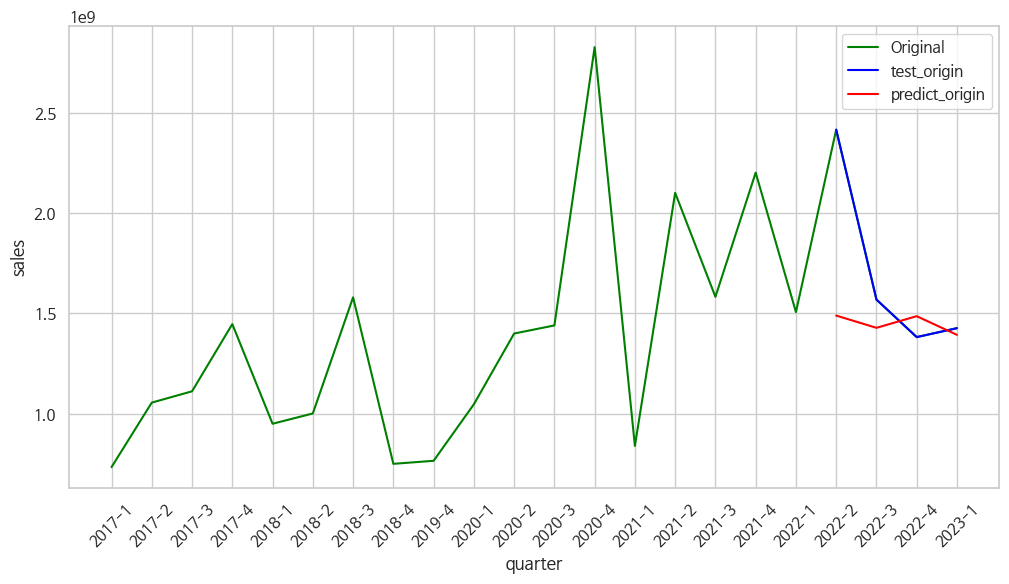

In [82]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [83]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.493481e+08
std      4.631393e+08
min     -1.043874e+08
25%     -1.106426e+06
50%      8.712110e+07
75%      3.375756e+08
max      9.275375e+08
dtype: float64

In [84]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.32085928]]
--------------------------------------------------------------------------------
예측된 매출  : 1405566848.0 


### 성장성

In [85]:
### X / y 데이터 생성
X = ap_light[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_light.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   7.331825e+08  2.663235e+07  -9.090909
1   1.055051e+09  5.514636e+07   0.000000
2   1.111395e+09  5.914295e+07   0.000000
3   1.446684e+09  8.639841e+07   0.000000
4   9.495109e+08  5.227863e+07 -10.000000
5   1.000762e+09  4.978807e+07   0.000000
6   1.580208e+09  1.271415e+08 -11.111111
7   7.495586e+08  4.037139e+07   0.000000
8   7.646029e+08  5.799608e+07   0.000000
9   1.046649e+09  9.787407e+07   0.000000
10  1.399606e+09  1.326238e+08  11.111111
11  1.439991e+09  3.195977e+07 -11.111111
12  2.828757e+09  2.474171e+08   0.000000
13  8.387520e+08  7.510066e+06   0.000000
14  2.101525e+09  1.610440e+08   0.000000
15  1.582706e+09 -4.234082e+06   0.000000
16  2.202571e+09  1.759828e+08   0.000000
17  1.506687e+09  1.132224e+07   0.000000
18  2.416818e+09  1.238093e+08   0.000000
19  1.569043e+09  3.577008e+07   0.000000
20  1.381860e+09  4.263063e+07   0.000000
24  1.426420e+09  8.634983e+07  -3.676408
----------------------------------

In [86]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (22, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (22, 1)


In [87]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (20, 1)
[[0.30954646 0.18622884 0.5       ]
 [0.33081031 0.35995816 0.33456165]]


In [88]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (16, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (16, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (16, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (16, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [89]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1846
Epoch 1: val_loss improved from inf to 0.34495, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.1846 - val_loss: 0.3450
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1773
Epoch 2: val_loss improved from 0.34495 to 0.33367, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.1773 - val_loss: 0.3337
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1703
Epoch 3: val_loss improved from 0.33367 to 0.32272, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.1703 - val_loss: 0.3227
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1634
Epoch 4: val_loss improved from 0.32272 to 0.31204, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.1634 - val_loss: 0.3120
Epoch 5/100
1/1 [=================

In [91]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 827ms/step
[[0.5155784 ]
 [0.4652779 ]
 [0.50883687]
 [0.4454321 ]]


In [92]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.591913,0.515578
2022-3,0.159667,0.465278
2022-4,0.264457,0.508837
2023-1,0.446659,0.445432


In [93]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 3].values       # 성장성이 ap_light의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.591913,0.515578,1.604061,1.435437,0.168624
2022-3,0.159667,0.465278,0.649218,1.324321,-0.675103
2022-4,0.264457,0.508837,0.880703,1.420544,-0.539842
2023-1,0.446659,0.445432,1.283193,1.280481,0.002711


In [94]:
df_test = df_test.reset_index()

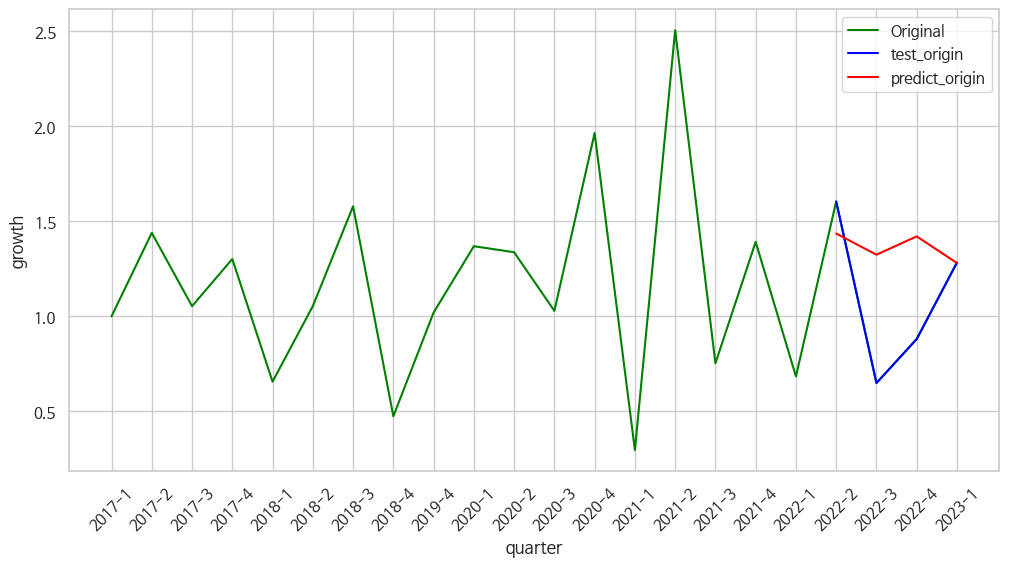

In [95]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [96]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.260902
std      0.409616
min     -0.675103
25%     -0.573657
50%     -0.268565
75%      0.044189
max      0.168624
dtype: float64

In [97]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 27ms/step
[[0.4311101]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.248843789100647 


### 시장성

In [98]:
### X / y 데이터 생성
X = ap_light[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_light.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   7.331825e+08  1.000000  -9.090909
1   1.055051e+09  1.439002   0.000000
2   1.111395e+09  1.053404   0.000000
3   1.446684e+09  1.301683   0.000000
4   9.495109e+08  0.656336 -10.000000
5   1.000762e+09  1.053976   0.000000
6   1.580208e+09  1.579005 -11.111111
7   7.495586e+08  0.474342   0.000000
8   7.646029e+08  1.020071   0.000000
9   1.046649e+09  1.368879   0.000000
10  1.399606e+09  1.337226  11.111111
11  1.439991e+09  1.028854 -11.111111
12  2.828757e+09  1.964427   0.000000
13  8.387520e+08  0.296509   0.000000
14  2.101525e+09  2.505538   0.000000
15  1.582706e+09  0.753123   0.000000
16  2.202571e+09  1.391649   0.000000
17  1.506687e+09  0.684058   0.000000
18  2.416818e+09  1.604061   0.000000
19  1.569043e+09  0.649218   0.000000
20  1.381860e+09  0.880703   0.000000
24  1.426420e+09  1.283193  -3.676408
--------------------------------------------------------------------------------
             시장성
0   2.663235e+07
1   5.51463

In [99]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (22, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (22, 1)


In [100]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (20, 1)
[[0.30954646 0.26445721 0.5       ]
 [0.33081031 0.44665943 0.33456165]]


In [101]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (16, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (16, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (16, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (16, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [102]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1929
Epoch 1: val_loss improved from inf to 0.25053, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.1929 - val_loss: 0.2505
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1857
Epoch 2: val_loss improved from 0.25053 to 0.24161, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.1857 - val_loss: 0.2416
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1787
Epoch 3: val_loss improved from 0.24161 to 0.23303, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.1787 - val_loss: 0.2330
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1719
Epoch 4: val_loss improved from 0.23303 to 0.22473, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.1719 - val_loss: 0.2247
Epoch 5/100
1/1 [=================

In [104]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 820ms/step
[[0.3896542 ]
 [0.3753197 ]
 [0.40283564]
 [0.34922794]]


In [105]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.508813,0.389654
2022-3,0.158967,0.375320
2022-4,0.186229,0.402836
2023-1,0.359958,0.349228


In [106]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 5].values       # 시장성이 ap_light의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.508813,0.389654,1.238093e+08,93822872.0,2.998641e+07
2022-3,0.158967,0.375320,3.577008e+07,90215576.0,-5.444550e+07
2022-4,0.186229,0.402836,4.263063e+07,97140000.0,-5.450937e+07
2023-1,0.359958,0.349228,8.634983e+07,83649560.0,2.700272e+06


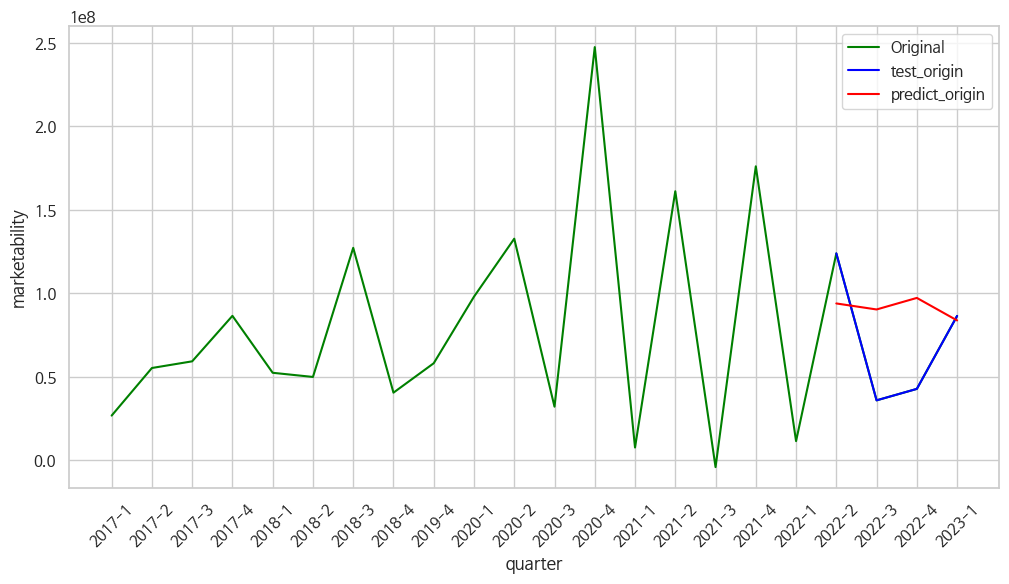

In [107]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [108]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.906705e+07
std      4.237865e+07
min     -5.450937e+07
25%     -5.446146e+07
50%     -2.587261e+07
75%      9.521805e+06
max      2.998641e+07
dtype: float64

In [109]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 24ms/step
[[0.34518263]]
--------------------------------------------------------------------------------
예측된 시장성  : 82631552.0 


### 순점포증감률

In [110]:
### X / y 데이터 생성
X = ap_light[['분기당_매출_금액', '성장성', '시장성']]
y = ap_light.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   7.331825e+08  1.000000  2.663235e+07
1   1.055051e+09  1.439002  5.514636e+07
2   1.111395e+09  1.053404  5.914295e+07
3   1.446684e+09  1.301683  8.639841e+07
4   9.495109e+08  0.656336  5.227863e+07
5   1.000762e+09  1.053976  4.978807e+07
6   1.580208e+09  1.579005  1.271415e+08
7   7.495586e+08  0.474342  4.037139e+07
8   7.646029e+08  1.020071  5.799608e+07
9   1.046649e+09  1.368879  9.787407e+07
10  1.399606e+09  1.337226  1.326238e+08
11  1.439991e+09  1.028854  3.195977e+07
12  2.828757e+09  1.964427  2.474171e+08
13  8.387520e+08  0.296509  7.510066e+06
14  2.101525e+09  2.505538  1.610440e+08
15  1.582706e+09  0.753123 -4.234082e+06
16  2.202571e+09  1.391649  1.759828e+08
17  1.506687e+09  0.684058  1.132224e+07
18  2.416818e+09  1.604061  1.238093e+08
19  1.569043e+09  0.649218  3.577008e+07
20  1.381860e+09  0.880703  4.263063e+07
24  1.426420e+09  1.283193  8.634983e+07
---------------------------------------------------------

In [111]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (22, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (22, 1)


In [112]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (20, 1)
[[0.30954646 0.26445721 0.18622884]
 [0.33081031 0.44665943 0.35995816]]


In [113]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (16, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (16, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (16, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (16, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [114]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [115]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2678
Epoch 1: val_loss improved from inf to 0.26482, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2678 - val_loss: 0.2648
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2596
Epoch 2: val_loss improved from 0.26482 to 0.25374, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.2596 - val_loss: 0.2537
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2516
Epoch 3: val_loss improved from 0.25374 to 0.24308, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.2516 - val_loss: 0.2431
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2439
Epoch 4: val_loss improved from 0.24308 to 0.23277, saving model to stock_model.h5
1/1 [==============================] - 0s 136ms/step - loss: 0.2439 - val_loss: 0.2328
Epoch 5/100
1/1 [==============

In [116]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 831ms/step
[[0.49015236]
 [0.39225757]
 [0.48412132]
 [0.34028977]]


In [117]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.500000,0.490152
2022-3,0.500000,0.392258
2022-4,0.500000,0.484121
2023-1,0.334562,0.340290


In [118]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_light의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.500000,0.490152,0.000000,-0.218836,0.218836
2022-3,0.500000,0.392258,0.000000,-2.394276,2.394276
2022-4,0.500000,0.484121,0.000000,-0.352859,0.352859
2023-1,0.334562,0.340290,-3.676408,-3.549116,-0.127292


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


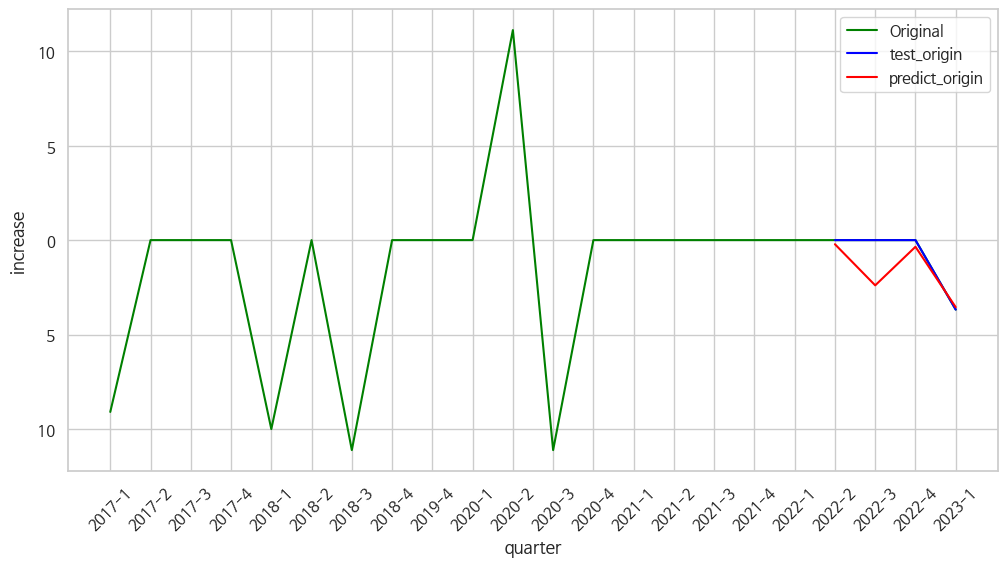

In [119]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [120]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.709670
std      1.141145
min     -0.127292
25%      0.132304
50%      0.285848
75%      0.863214
max      2.394276
dtype: float64

In [121]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 24ms/step
[[0.379497]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.677844524383545 


### 추가


In [122]:
ap_light.loc[25] = ['2023-2', '조명용품', sales, growth, increase, marketability]

<ipython-input-122-d825279da06d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_light.loc[25] = ['2023-2', '조명용품', sales, growth, increase, marketability]


In [123]:
ap_light

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,조명용품,7.331825e+08,1.000000,-9.090909,2.663235e+07
1,2017-2,조명용품,1.055051e+09,1.439002,0.000000,5.514636e+07
2,2017-3,조명용품,1.111395e+09,1.053404,0.000000,5.914295e+07
3,2017-4,조명용품,1.446684e+09,1.301683,0.000000,8.639841e+07
4,2018-1,조명용품,9.495109e+08,0.656336,-10.000000,5.227863e+07
5,2018-2,조명용품,1.000762e+09,1.053976,0.000000,4.978807e+07
6,2018-3,조명용품,1.580208e+09,1.579005,-11.111111,1.271415e+08
7,2018-4,조명용품,7.495586e+08,0.474342,0.000000,4.037139e+07
8,2019-4,조명용품,7.646029e+08,1.020071,0.000000,5.799608e+07
9,2020-1,조명용품,1.046649e+09,1.368879,0.000000,9.787407e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [124]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_light[['성장성', '시장성', '순점포증감률']]
y = ap_light.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000  2.663235e+07  -9.090909
1   1.439002  5.514636e+07   0.000000
2   1.053404  5.914295e+07   0.000000
3   1.301683  8.639841e+07   0.000000
4   0.656336  5.227863e+07 -10.000000
5   1.053976  4.978807e+07   0.000000
6   1.579005  1.271415e+08 -11.111111
7   0.474342  4.037139e+07   0.000000
8   1.020071  5.799608e+07   0.000000
9   1.368879  9.787407e+07   0.000000
10  1.337226  1.326238e+08  11.111111
11  1.028854  3.195977e+07 -11.111111
12  1.964427  2.474171e+08   0.000000
13  0.296509  7.510066e+06   0.000000
14  2.505538  1.610440e+08   0.000000
15  0.753123 -4.234082e+06   0.000000
16  1.391649  1.759828e+08   0.000000
17  0.684058  1.132224e+07   0.000000
18  1.604061  1.238093e+08   0.000000
19  0.649218  3.577008e+07   0.000000
20  0.880703  4.263063e+07   0.000000
24  1.283193  8.634983e+07  -3.676408
25  1.248844  8.263155e+07  -2.677845
--------------------------------------------------------------------------------
       

In [125]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (23, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (23, 1)


In [126]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (21, 1)
[[0.44665943 0.35995816 0.33456165]
 [0.43111014 0.34518263 0.379497  ]]


In [127]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [128]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1424
Epoch 1: val_loss improved from inf to 0.38891, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1424 - val_loss: 0.3889
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1367
Epoch 2: val_loss improved from 0.38891 to 0.37528, saving model to stock_model.h5
1/1 [==============================] - 0s 122ms/step - loss: 0.1367 - val_loss: 0.3753
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1311
Epoch 3: val_loss improved from 0.37528 to 0.36203, saving model to stock_model.h5
1/1 [==============================] - 0s 142ms/step - loss: 0.1311 - val_loss: 0.3620
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1259
Epoch 4: val_loss improved from 0.36203 to 0.34912, saving model to stock_model.h5
1/1 [==============================] - 0s 127ms/step - loss: 0.1259 - val_loss: 0.3491
Epoch 5/100
1/1 [==============

In [130]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 811ms/step
[[0.33206612]
 [0.35961282]
 [0.31564403]
 [0.32113674]]


In [131]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.398869,0.332066
2022-4,0.309546,0.359613
2023-1,0.330810,0.315644
2023-2,0.320859,0.321137


In [132]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_light의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.398869,0.332066,1.569043e+09,1.429052e+09,139991058.0
2022-4,0.309546,0.359613,1.381860e+09,1.486778e+09,-104917736.0
2023-1,0.330810,0.315644,1.426420e+09,1.394638e+09,31782144.0
2023-2,0.320859,0.321137,1.405567e+09,1.406148e+09,-581504.0


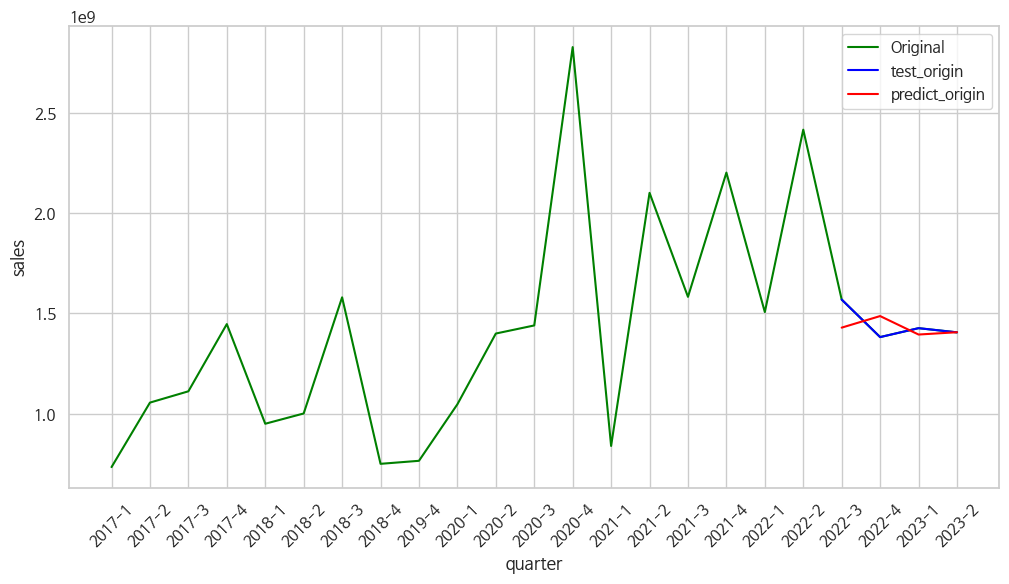

In [133]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [134]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.656849e+07
std      1.008590e+08
min     -1.049177e+08
25%     -2.666556e+07
50%      1.560032e+07
75%      5.883437e+07
max      1.399911e+08
dtype: float64

In [135]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 30ms/step
[[0.31769022]]
--------------------------------------------------------------------------------
예측된 매출  : 1398925824.0 


### 성장성

In [136]:
X = ap_light[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_light.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   7.331825e+08  2.663235e+07  -9.090909
1   1.055051e+09  5.514636e+07   0.000000
2   1.111395e+09  5.914295e+07   0.000000
3   1.446684e+09  8.639841e+07   0.000000
4   9.495109e+08  5.227863e+07 -10.000000
5   1.000762e+09  4.978807e+07   0.000000
6   1.580208e+09  1.271415e+08 -11.111111
7   7.495586e+08  4.037139e+07   0.000000
8   7.646029e+08  5.799608e+07   0.000000
9   1.046649e+09  9.787407e+07   0.000000
10  1.399606e+09  1.326238e+08  11.111111
11  1.439991e+09  3.195977e+07 -11.111111
12  2.828757e+09  2.474171e+08   0.000000
13  8.387520e+08  7.510066e+06   0.000000
14  2.101525e+09  1.610440e+08   0.000000
15  1.582706e+09 -4.234082e+06   0.000000
16  2.202571e+09  1.759828e+08   0.000000
17  1.506687e+09  1.132224e+07   0.000000
18  2.416818e+09  1.238093e+08   0.000000
19  1.569043e+09  3.577008e+07   0.000000
20  1.381860e+09  4.263063e+07   0.000000
24  1.426420e+09  8.634983e+07  -3.676408
25  1.405567e+09  8.263155e+07  -2

In [137]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (23, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (23, 1)


In [138]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (21, 1)
[[0.33081031 0.35995816 0.33456165]
 [0.32085928 0.34518263 0.379497  ]]


In [139]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [140]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [141]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1846
Epoch 1: val_loss improved from inf to 0.34963, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1846 - val_loss: 0.3496
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1773
Epoch 2: val_loss improved from 0.34963 to 0.33778, saving model to stock_model.h5
1/1 [==============================] - 0s 127ms/step - loss: 0.1773 - val_loss: 0.3378
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1703
Epoch 3: val_loss improved from 0.33778 to 0.32626, saving model to stock_model.h5
1/1 [==============================] - 0s 127ms/step - loss: 0.1703 - val_loss: 0.3263
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1634
Epoch 4: val_loss improved from 0.32626 to 0.31503, saving model to stock_model.h5
1/1 [==============================] - 0s 118ms/step - loss: 0.1634 - val_loss: 0.3150
Epoch 5/100
1/1 [==============

In [142]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 771ms/step
[[0.47091275]
 [0.51473784]
 [0.45157188]
 [0.4371734 ]]


In [143]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.159667,0.470913
2022-4,0.264457,0.514738
2023-1,0.446659,0.451572
2023-2,0.431110,0.437173


In [144]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 3].values       # 성장성이 ap_light의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.159667,0.470913,0.649218,1.336769,-0.687551
2022-4,0.264457,0.514738,0.880703,1.433580,-0.552877
2023-1,0.446659,0.451572,1.283193,1.294044,-0.010852
2023-2,0.431110,0.437173,1.248844,1.262238,-0.013394


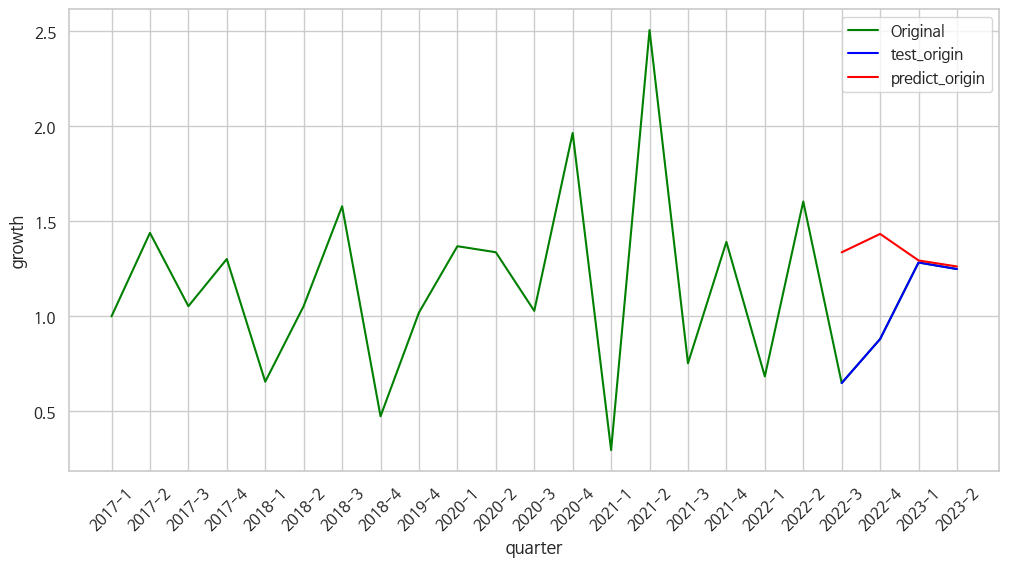

In [145]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [146]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.316168
std      0.355362
min     -0.687551
25%     -0.586545
50%     -0.283136
75%     -0.012758
max     -0.010852
dtype: float64

In [147]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.42100364]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.226518154144287 


### 시장성

In [148]:
### X / y 데이터 생성
X = ap_light[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_light.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   7.331825e+08  1.000000  -9.090909
1   1.055051e+09  1.439002   0.000000
2   1.111395e+09  1.053404   0.000000
3   1.446684e+09  1.301683   0.000000
4   9.495109e+08  0.656336 -10.000000
5   1.000762e+09  1.053976   0.000000
6   1.580208e+09  1.579005 -11.111111
7   7.495586e+08  0.474342   0.000000
8   7.646029e+08  1.020071   0.000000
9   1.046649e+09  1.368879   0.000000
10  1.399606e+09  1.337226  11.111111
11  1.439991e+09  1.028854 -11.111111
12  2.828757e+09  1.964427   0.000000
13  8.387520e+08  0.296509   0.000000
14  2.101525e+09  2.505538   0.000000
15  1.582706e+09  0.753123   0.000000
16  2.202571e+09  1.391649   0.000000
17  1.506687e+09  0.684058   0.000000
18  2.416818e+09  1.604061   0.000000
19  1.569043e+09  0.649218   0.000000
20  1.381860e+09  0.880703   0.000000
24  1.426420e+09  1.283193  -3.676408
25  1.405567e+09  1.248844  -2.677845
--------------------------------------------------------------------------------
       

In [149]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (23, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (23, 1)


In [150]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (21, 1)
[[0.33081031 0.44665943 0.33456165]
 [0.32085928 0.43111014 0.379497  ]]


In [151]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [152]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [153]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1929
Epoch 1: val_loss improved from inf to 0.25475, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.1929 - val_loss: 0.2548
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1857
Epoch 2: val_loss improved from 0.25475 to 0.24531, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.1857 - val_loss: 0.2453
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1787
Epoch 3: val_loss improved from 0.24531 to 0.23621, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.1787 - val_loss: 0.2362
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1719
Epoch 4: val_loss improved from 0.23621 to 0.22739, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.1719 - val_loss: 0.2274
Epoch 5/100
1/1 [=================

In [154]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 811ms/step
[[0.3938115 ]
 [0.42326352]
 [0.36624843]
 [0.36213425]]


In [155]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.158967,0.393811
2022-4,0.186229,0.423264
2023-1,0.359958,0.366248
2023-2,0.345183,0.362134


In [156]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 5].values       # 시장성이 ap_light의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.158967,0.393811,3.577008e+07,94869064.0,-5.909899e+07
2022-4,0.186229,0.423264,4.263063e+07,102280704.0,-5.965007e+07
2023-1,0.359958,0.366248,8.634983e+07,87932784.0,-1.582952e+06
2023-2,0.345183,0.362134,8.263155e+07,86897448.0,-4.265896e+06


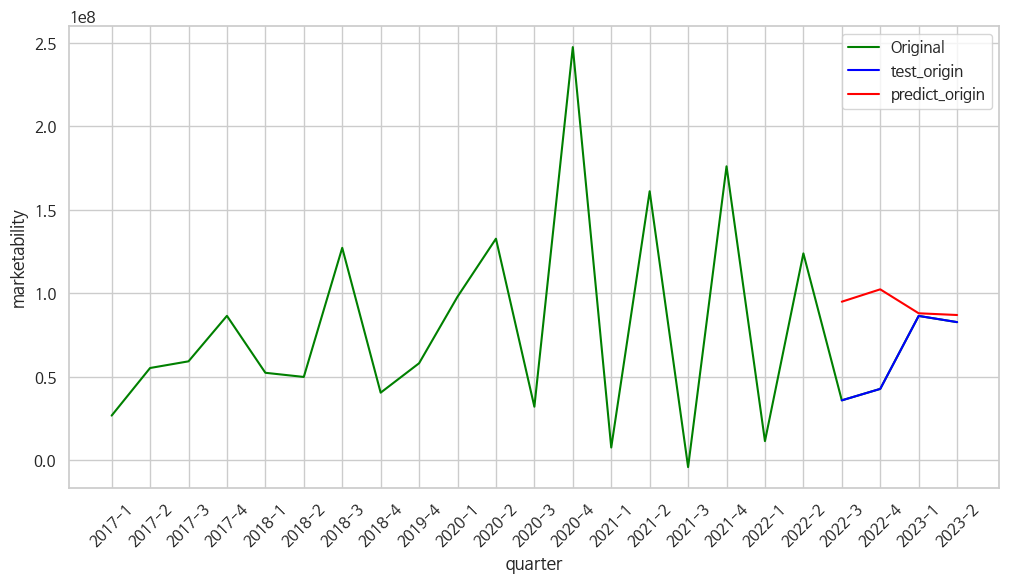

In [157]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [158]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -3.114948e+07
std      3.261066e+07
min     -5.965007e+07
25%     -5.923676e+07
50%     -3.168244e+07
75%     -3.595160e+06
max     -1.582952e+06
dtype: float64

In [159]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 26ms/step
[[0.35208935]]
--------------------------------------------------------------------------------
예측된 시장성  : 84369632.0 


### 순점포증감률

In [160]:
### X / y 데이터 생성
X = ap_light[['분기당_매출_금액', '성장성', '시장성']]
y = ap_light.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   7.331825e+08  1.000000  2.663235e+07
1   1.055051e+09  1.439002  5.514636e+07
2   1.111395e+09  1.053404  5.914295e+07
3   1.446684e+09  1.301683  8.639841e+07
4   9.495109e+08  0.656336  5.227863e+07
5   1.000762e+09  1.053976  4.978807e+07
6   1.580208e+09  1.579005  1.271415e+08
7   7.495586e+08  0.474342  4.037139e+07
8   7.646029e+08  1.020071  5.799608e+07
9   1.046649e+09  1.368879  9.787407e+07
10  1.399606e+09  1.337226  1.326238e+08
11  1.439991e+09  1.028854  3.195977e+07
12  2.828757e+09  1.964427  2.474171e+08
13  8.387520e+08  0.296509  7.510066e+06
14  2.101525e+09  2.505538  1.610440e+08
15  1.582706e+09  0.753123 -4.234082e+06
16  2.202571e+09  1.391649  1.759828e+08
17  1.506687e+09  0.684058  1.132224e+07
18  2.416818e+09  1.604061  1.238093e+08
19  1.569043e+09  0.649218  3.577008e+07
20  1.381860e+09  0.880703  4.263063e+07
24  1.426420e+09  1.283193  8.634983e+07
25  1.405567e+09  1.248844  8.263155e+07
----------------

In [161]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (23, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (23, 1)


In [162]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (21, 1)
[[0.33081031 0.44665943 0.35995816]
 [0.32085928 0.43111014 0.34518263]]


In [163]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [164]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [165]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2678
Epoch 1: val_loss improved from inf to 0.26440, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2678 - val_loss: 0.2644
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2596
Epoch 2: val_loss improved from 0.26440 to 0.25331, saving model to stock_model.h5
1/1 [==============================] - 0s 145ms/step - loss: 0.2596 - val_loss: 0.2533
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2516
Epoch 3: val_loss improved from 0.25331 to 0.24264, saving model to stock_model.h5
1/1 [==============================] - 0s 124ms/step - loss: 0.2516 - val_loss: 0.2426
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2439
Epoch 4: val_loss improved from 0.24264 to 0.23232, saving model to stock_model.h5
1/1 [==============================] - 0s 131ms/step - loss: 0.2439 - val_loss: 0.2323
Epoch 5/100
1/1 [==============

In [166]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 811ms/step
[[0.39225757]
 [0.48412132]
 [0.34028977]
 [0.379497  ]]


In [167]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.500000,0.392258
2022-4,0.500000,0.484121
2023-1,0.334562,0.340290
2023-2,0.379497,0.379497


In [168]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_light의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.500000,0.392258,0.000000,-2.394276,2.394276
2022-4,0.500000,0.484121,0.000000,-0.352859,0.352859
2023-1,0.334562,0.340290,-3.676408,-3.549116,-0.127292
2023-2,0.379497,0.379497,-2.677845,-2.677845,0.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


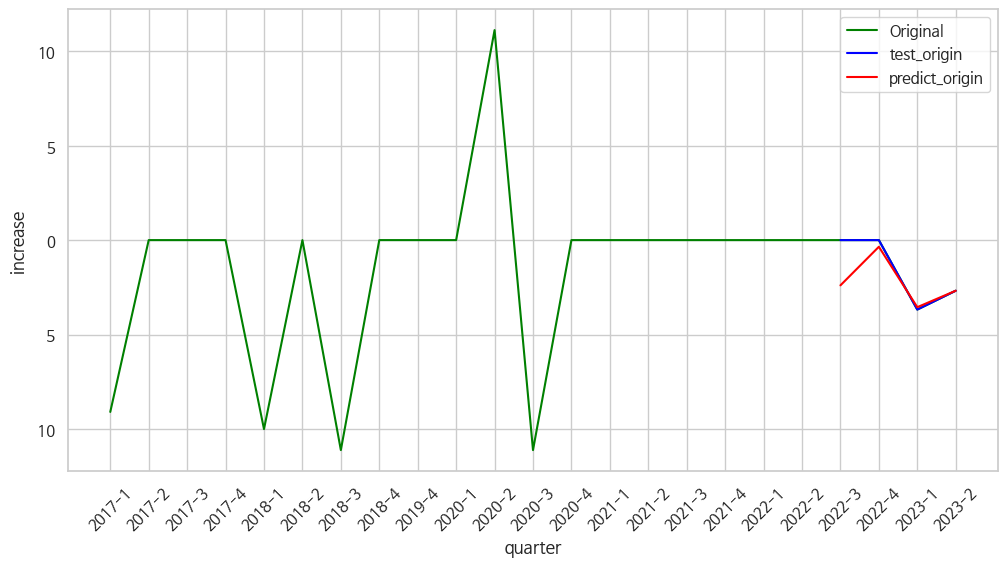

In [169]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [170]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.654961
std      1.177197
min     -0.127292
25%     -0.031823
50%      0.176430
75%      0.863214
max      2.394276
dtype: float64

In [171]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 25ms/step
[[0.43281266]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.4930520057678223 


### 추가

In [172]:
ap_light.loc[26] = ['2023-3', '조명용품', sales, growth, increase, marketability]

<ipython-input-172-1ecd91585e93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_light.loc[26] = ['2023-3', '조명용품', sales, growth, increase, marketability]


In [173]:
ap_light

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,조명용품,7.331825e+08,1.000000,-9.090909,2.663235e+07
1,2017-2,조명용품,1.055051e+09,1.439002,0.000000,5.514636e+07
2,2017-3,조명용품,1.111395e+09,1.053404,0.000000,5.914295e+07
3,2017-4,조명용품,1.446684e+09,1.301683,0.000000,8.639841e+07
4,2018-1,조명용품,9.495109e+08,0.656336,-10.000000,5.227863e+07
5,2018-2,조명용품,1.000762e+09,1.053976,0.000000,4.978807e+07
6,2018-3,조명용품,1.580208e+09,1.579005,-11.111111,1.271415e+08
7,2018-4,조명용품,7.495586e+08,0.474342,0.000000,4.037139e+07
8,2019-4,조명용품,7.646029e+08,1.020071,0.000000,5.799608e+07
9,2020-1,조명용품,1.046649e+09,1.368879,0.000000,9.787407e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [174]:
### X / y 데이터 생성
X = ap_light[['성장성', '시장성', '순점포증감률']]
y = ap_light.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000  2.663235e+07  -9.090909
1   1.439002  5.514636e+07   0.000000
2   1.053404  5.914295e+07   0.000000
3   1.301683  8.639841e+07   0.000000
4   0.656336  5.227863e+07 -10.000000
5   1.053976  4.978807e+07   0.000000
6   1.579005  1.271415e+08 -11.111111
7   0.474342  4.037139e+07   0.000000
8   1.020071  5.799608e+07   0.000000
9   1.368879  9.787407e+07   0.000000
10  1.337226  1.326238e+08  11.111111
11  1.028854  3.195977e+07 -11.111111
12  1.964427  2.474171e+08   0.000000
13  0.296509  7.510066e+06   0.000000
14  2.505538  1.610440e+08   0.000000
15  0.753123 -4.234082e+06   0.000000
16  1.391649  1.759828e+08   0.000000
17  0.684058  1.132224e+07   0.000000
18  1.604061  1.238093e+08   0.000000
19  0.649218  3.577008e+07   0.000000
20  0.880703  4.263063e+07   0.000000
24  1.283193  8.634983e+07  -3.676408
25  1.248844  8.263155e+07  -2.677845
26  1.226518  8.436963e+07  -1.493052
--------------------------------------------------

In [175]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [176]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)
[[0.43111014 0.34518263 0.379497  ]
 [0.4210036  0.35208934 0.43281266]]


In [177]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [178]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [179]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1675
Epoch 1: val_loss improved from inf to 0.33145, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1675 - val_loss: 0.3315
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1609
Epoch 2: val_loss improved from 0.33145 to 0.31945, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.1609 - val_loss: 0.3195
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1546
Epoch 3: val_loss improved from 0.31945 to 0.30781, saving model to stock_model.h5
1/1 [==============================] - 0s 133ms/step - loss: 0.1546 - val_loss: 0.3078
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1485
Epoch 4: val_loss improved from 0.30781 to 0.29648, saving model to stock_model.h5
1/1 [==============================] - 0s 137ms/step - loss: 0.1485 - val_loss: 0.2965
Epoch 5/100
1/1 [===============

In [180]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 833ms/step
[[0.39919642]
 [0.3405017 ]
 [0.35081995]
 [0.353643  ]]


In [181]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.309546,0.399196
2023-1,0.330810,0.340502
2023-2,0.320859,0.350820
2023-3,0.317690,0.353643


In [182]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_light의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.309546,0.399196,1.381860e+09,1.569728e+09,-187868136.0
2023-1,0.330810,0.340502,1.426420e+09,1.446729e+09,-20308992.0
2023-2,0.320859,0.350820,1.405567e+09,1.468352e+09,-62784768.0
2023-3,0.317690,0.353643,1.398926e+09,1.474268e+09,-75341696.0


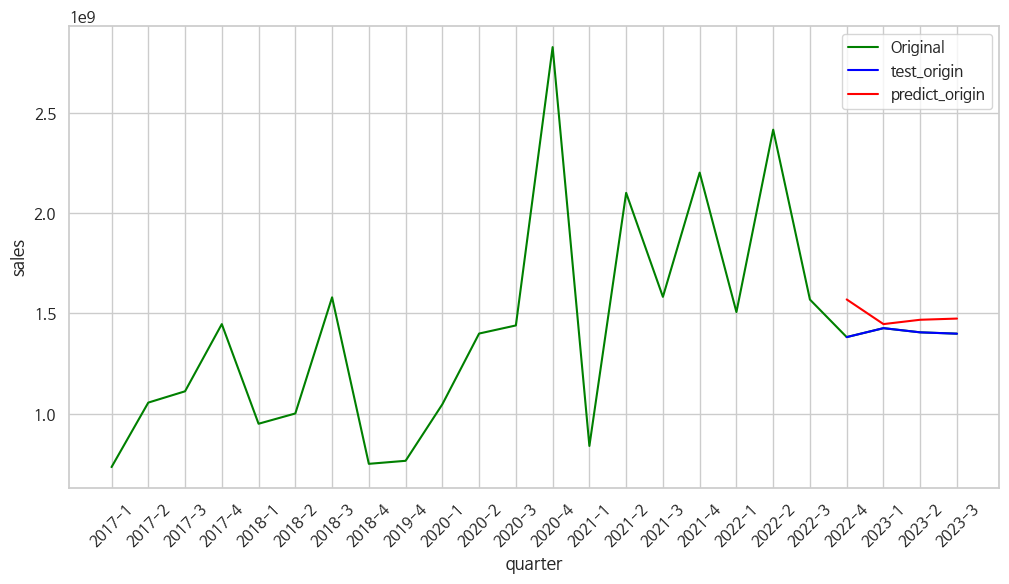

In [183]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [184]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -8.657590e+07
std      7.151607e+07
min     -1.878681e+08
25%     -1.034733e+08
50%     -6.906323e+07
75%     -5.216582e+07
max     -2.030899e+07
dtype: float64

In [185]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 28ms/step
[[0.36370978]]
--------------------------------------------------------------------------------
예측된 매출  : 1495363328.0 


### 성장성

In [186]:
X = ap_light[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_light.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   7.331825e+08  2.663235e+07  -9.090909
1   1.055051e+09  5.514636e+07   0.000000
2   1.111395e+09  5.914295e+07   0.000000
3   1.446684e+09  8.639841e+07   0.000000
4   9.495109e+08  5.227863e+07 -10.000000
5   1.000762e+09  4.978807e+07   0.000000
6   1.580208e+09  1.271415e+08 -11.111111
7   7.495586e+08  4.037139e+07   0.000000
8   7.646029e+08  5.799608e+07   0.000000
9   1.046649e+09  9.787407e+07   0.000000
10  1.399606e+09  1.326238e+08  11.111111
11  1.439991e+09  3.195977e+07 -11.111111
12  2.828757e+09  2.474171e+08   0.000000
13  8.387520e+08  7.510066e+06   0.000000
14  2.101525e+09  1.610440e+08   0.000000
15  1.582706e+09 -4.234082e+06   0.000000
16  2.202571e+09  1.759828e+08   0.000000
17  1.506687e+09  1.132224e+07   0.000000
18  2.416818e+09  1.238093e+08   0.000000
19  1.569043e+09  3.577008e+07   0.000000
20  1.381860e+09  4.263063e+07   0.000000
24  1.426420e+09  8.634983e+07  -3.676408
25  1.405567e+09  8.263155e+07  -2

In [187]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [188]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)
[[0.32085928 0.34518263 0.379497  ]
 [0.31769021 0.35208934 0.43281266]]


In [189]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [190]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [191]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2524
Epoch 1: val_loss improved from inf to 0.14703, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2524 - val_loss: 0.1470
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2437
Epoch 2: val_loss improved from 0.14703 to 0.13947, saving model to stock_model.h5
1/1 [==============================] - 0s 125ms/step - loss: 0.2437 - val_loss: 0.1395
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2352
Epoch 3: val_loss improved from 0.13947 to 0.13222, saving model to stock_model.h5
1/1 [==============================] - 0s 130ms/step - loss: 0.2352 - val_loss: 0.1322
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2270
Epoch 4: val_loss improved from 0.13222 to 0.12526, saving model to stock_model.h5
1/1 [==============================] - 0s 126ms/step - loss: 0.2270 - val_loss: 0.1253
Epoch 5/100
1/1 [==============

In [192]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.37267524]
 [0.32204455]
 [0.31076795]
 [0.30194023]]


In [193]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.264457,0.372675
2023-1,0.446659,0.322045
2023-2,0.431110,0.310768
2023-3,0.421004,0.301940


In [194]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 3].values       # 성장성이 ap_light의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.264457,0.372675,0.880703,1.119759,-0.239057
2023-1,0.446659,0.322045,1.283193,1.007915,0.275278
2023-2,0.431110,0.310768,1.248844,0.983004,0.265839
2023-3,0.421004,0.301940,1.226518,0.963504,0.263014


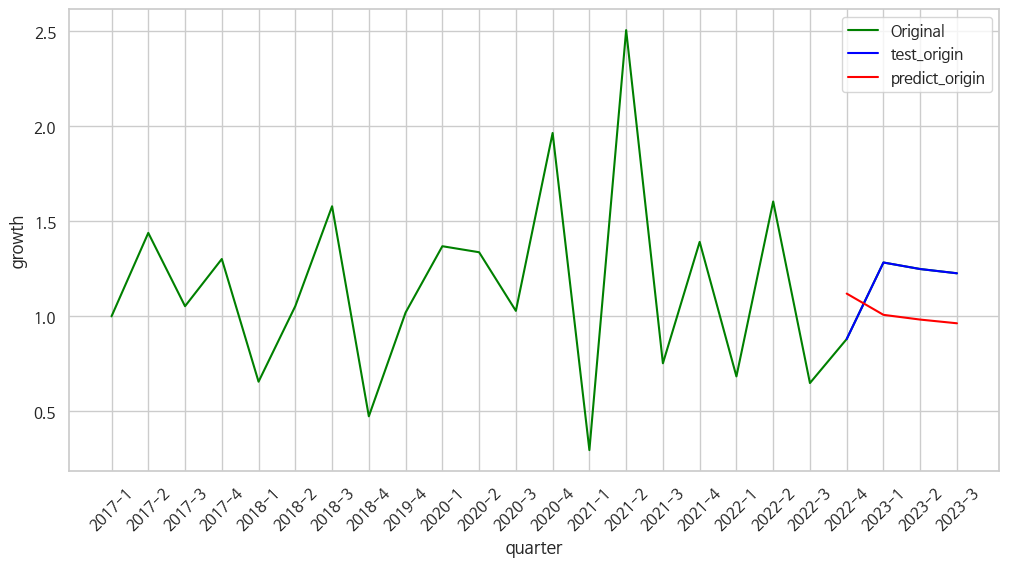

In [195]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [196]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.141269
std      0.253604
min     -0.239057
25%      0.137497
50%      0.264427
75%      0.268199
max      0.275278
dtype: float64

In [197]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.31098384]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9834813475608826 


###시장성

In [198]:
### X / y 데이터 생성
X = ap_light[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_light.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   7.331825e+08  1.000000  -9.090909
1   1.055051e+09  1.439002   0.000000
2   1.111395e+09  1.053404   0.000000
3   1.446684e+09  1.301683   0.000000
4   9.495109e+08  0.656336 -10.000000
5   1.000762e+09  1.053976   0.000000
6   1.580208e+09  1.579005 -11.111111
7   7.495586e+08  0.474342   0.000000
8   7.646029e+08  1.020071   0.000000
9   1.046649e+09  1.368879   0.000000
10  1.399606e+09  1.337226  11.111111
11  1.439991e+09  1.028854 -11.111111
12  2.828757e+09  1.964427   0.000000
13  8.387520e+08  0.296509   0.000000
14  2.101525e+09  2.505538   0.000000
15  1.582706e+09  0.753123   0.000000
16  2.202571e+09  1.391649   0.000000
17  1.506687e+09  0.684058   0.000000
18  2.416818e+09  1.604061   0.000000
19  1.569043e+09  0.649218   0.000000
20  1.381860e+09  0.880703   0.000000
24  1.426420e+09  1.283193  -3.676408
25  1.405567e+09  1.248844  -2.677845
26  1.398926e+09  1.226518  -1.493052
--------------------------------------------------

In [199]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [200]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)
[[0.32085928 0.43111014 0.379497  ]
 [0.31769021 0.4210036  0.43281266]]


In [201]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [202]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [203]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2140
Epoch 1: val_loss improved from inf to 0.17024, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2140 - val_loss: 0.1702
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2060
Epoch 2: val_loss improved from 0.17024 to 0.16303, saving model to stock_model.h5
1/1 [==============================] - 0s 104ms/step - loss: 0.2060 - val_loss: 0.1630
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1984
Epoch 3: val_loss improved from 0.16303 to 0.15616, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.1984 - val_loss: 0.1562
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1909
Epoch 4: val_loss improved from 0.15616 to 0.14960, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.1909 - val_loss: 0.1496
Epoch 5/100
1/1 [===============

In [204]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.324377  ]
 [0.28134388]
 [0.27585632]
 [0.26813206]]


In [205]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.186229,0.324377
2023-1,0.359958,0.281344
2023-2,0.345183,0.275856
2023-3,0.352089,0.268132


In [206]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 5].values       # 시장성이 ap_light의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.186229,0.324377,4.263063e+07,77395792.0,-3.476516e+07
2023-1,0.359958,0.281344,8.634983e+07,66566452.0,1.978338e+07
2023-2,0.345183,0.275856,8.263155e+07,65185500.0,1.744605e+07
2023-3,0.352089,0.268132,8.436963e+07,63241680.0,2.112795e+07


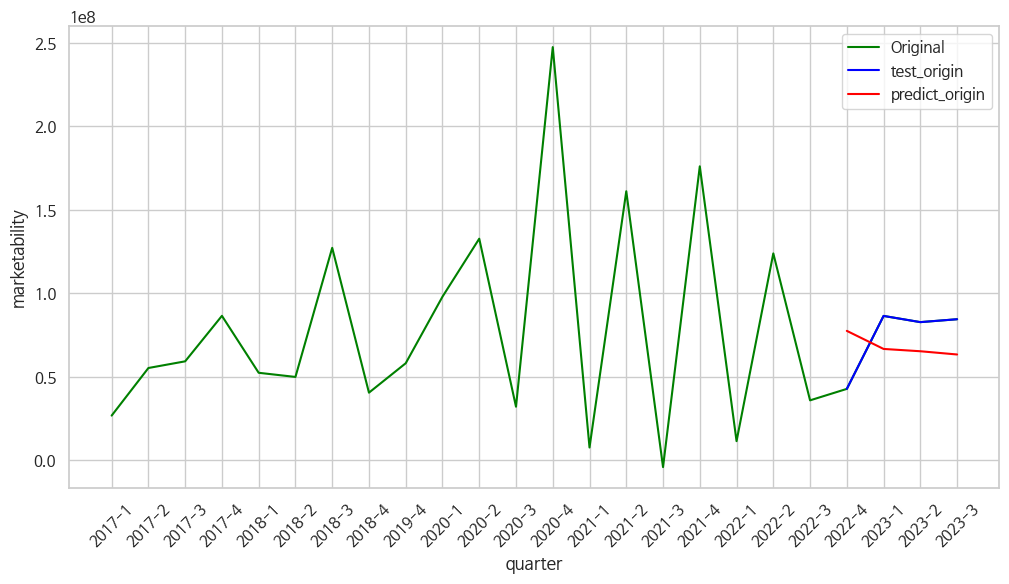

In [207]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [208]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     5.898057e+06
std      2.715146e+07
min     -3.476516e+07
25%      4.393250e+06
50%      1.861472e+07
75%      2.011952e+07
max      2.112795e+07
dtype: float64

In [209]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 24ms/step
[[0.27553725]]
--------------------------------------------------------------------------------
예측된 시장성  : 65105208.0 


### 순점포증감률

In [210]:
### X / y 데이터 생성
X = ap_light[['분기당_매출_금액', '성장성', '시장성']]
y = ap_light.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   7.331825e+08  1.000000  2.663235e+07
1   1.055051e+09  1.439002  5.514636e+07
2   1.111395e+09  1.053404  5.914295e+07
3   1.446684e+09  1.301683  8.639841e+07
4   9.495109e+08  0.656336  5.227863e+07
5   1.000762e+09  1.053976  4.978807e+07
6   1.580208e+09  1.579005  1.271415e+08
7   7.495586e+08  0.474342  4.037139e+07
8   7.646029e+08  1.020071  5.799608e+07
9   1.046649e+09  1.368879  9.787407e+07
10  1.399606e+09  1.337226  1.326238e+08
11  1.439991e+09  1.028854  3.195977e+07
12  2.828757e+09  1.964427  2.474171e+08
13  8.387520e+08  0.296509  7.510066e+06
14  2.101525e+09  2.505538  1.610440e+08
15  1.582706e+09  0.753123 -4.234082e+06
16  2.202571e+09  1.391649  1.759828e+08
17  1.506687e+09  0.684058  1.132224e+07
18  2.416818e+09  1.604061  1.238093e+08
19  1.569043e+09  0.649218  3.577008e+07
20  1.381860e+09  0.880703  4.263063e+07
24  1.426420e+09  1.283193  8.634983e+07
25  1.405567e+09  1.248844  8.263155e+07
26  1.398926e+09

In [211]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [212]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)
[[0.32085928 0.43111014 0.34518263]
 [0.31769021 0.4210036  0.35208934]]


In [213]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [214]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [215]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2686
Epoch 1: val_loss improved from inf to 0.26332, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2686 - val_loss: 0.2633
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2600
Epoch 2: val_loss improved from 0.26332 to 0.25270, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2600 - val_loss: 0.2527
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2517
Epoch 3: val_loss improved from 0.25270 to 0.24243, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2517 - val_loss: 0.2424
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2436
Epoch 4: val_loss improved from 0.24243 to 0.23249, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2436 - val_loss: 0.2325
Epoch 5/100
1/1 [=================

In [216]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.54751927]
 [0.380517  ]
 [0.4218279 ]
 [0.48138064]]


In [217]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.500000,0.547519
2023-1,0.334562,0.380517
2023-2,0.379497,0.421828
2023-3,0.432813,0.481381


In [218]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_light의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.500000,0.547519,0.000000,1.055984,-1.055984
2023-1,0.334562,0.380517,-3.676408,-2.655178,-1.021230
2023-2,0.379497,0.421828,-2.677845,-1.737157,-0.940687
2023-3,0.432813,0.481381,-1.493052,-0.413764,-1.079288


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


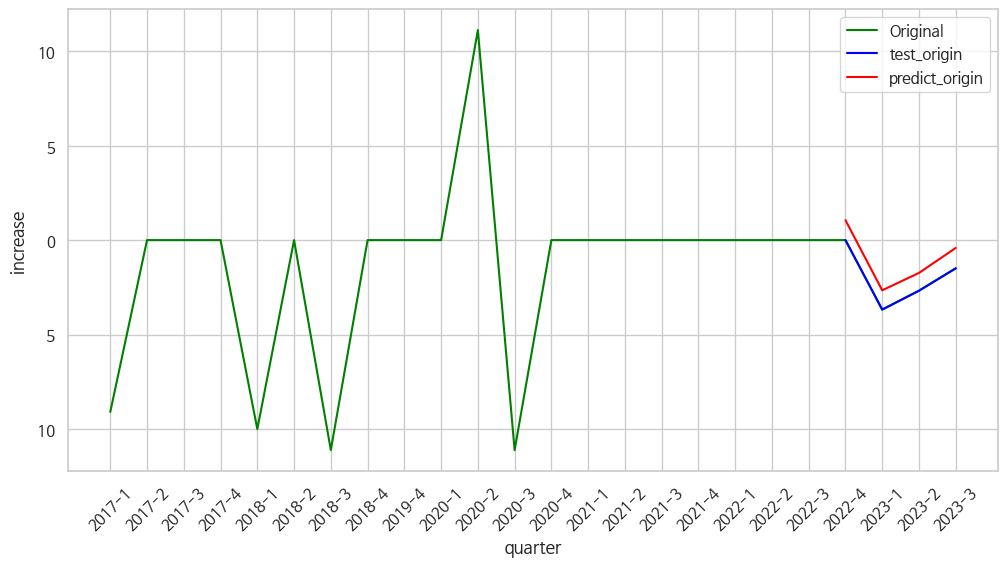

In [219]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_light['분기'], ap_light['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [220]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -1.024297
std      0.060630
min     -1.079288
25%     -1.061810
50%     -1.038607
75%     -1.001094
max     -0.940687
dtype: float64

In [221]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 26ms/step
[[0.4749965]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.5556331872940063 


### 추가

In [222]:
ap_light.loc[27] = ['2023-4', '조명용품', sales, growth, increase, marketability]

<ipython-input-222-a67bf238a6e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_light.loc[27] = ['2023-4', '조명용품', sales, growth, increase, marketability]


In [223]:
final_ap_light = ap_light
final_ap_light

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,조명용품,7.331825e+08,1.000000,-9.090909,2.663235e+07
1,2017-2,조명용품,1.055051e+09,1.439002,0.000000,5.514636e+07
2,2017-3,조명용품,1.111395e+09,1.053404,0.000000,5.914295e+07
3,2017-4,조명용품,1.446684e+09,1.301683,0.000000,8.639841e+07
4,2018-1,조명용품,9.495109e+08,0.656336,-10.000000,5.227863e+07
5,2018-2,조명용품,1.000762e+09,1.053976,0.000000,4.978807e+07
6,2018-3,조명용품,1.580208e+09,1.579005,-11.111111,1.271415e+08
7,2018-4,조명용품,7.495586e+08,0.474342,0.000000,4.037139e+07
8,2019-4,조명용품,7.646029e+08,1.020071,0.000000,5.799608e+07
9,2020-1,조명용품,1.046649e+09,1.368879,0.000000,9.787407e+07


## 최종결과

In [224]:
### X / y 데이터 생성
X = ap_light[['성장성', '시장성', '순점포증감률']]
y = ap_light.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000  2.663235e+07  -9.090909
1   1.439002  5.514636e+07   0.000000
2   1.053404  5.914295e+07   0.000000
3   1.301683  8.639841e+07   0.000000
4   0.656336  5.227863e+07 -10.000000
5   1.053976  4.978807e+07   0.000000
6   1.579005  1.271415e+08 -11.111111
7   0.474342  4.037139e+07   0.000000
8   1.020071  5.799608e+07   0.000000
9   1.368879  9.787407e+07   0.000000
10  1.337226  1.326238e+08  11.111111
11  1.028854  3.195977e+07 -11.111111
12  1.964427  2.474171e+08   0.000000
13  0.296509  7.510066e+06   0.000000
14  2.505538  1.610440e+08   0.000000
15  0.753123 -4.234082e+06   0.000000
16  1.391649  1.759828e+08   0.000000
17  0.684058  1.132224e+07   0.000000
18  1.604061  1.238093e+08   0.000000
19  0.649218  3.577008e+07   0.000000
20  0.880703  4.263063e+07   0.000000
24  1.283193  8.634983e+07  -3.676408
25  1.248844  8.263155e+07  -2.677845
26  1.226518  8.436963e+07  -1.493052
27  0.983481  6.510521e+07  -0.555633
------------

In [225]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [226]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.4210036  0.35208934 0.43281266]
 [0.31098384 0.27553726 0.47499651]]


In [227]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [228]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [229]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1685
Epoch 1: val_loss improved from inf to 0.31766, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1685 - val_loss: 0.3177
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1617
Epoch 2: val_loss improved from 0.31766 to 0.30596, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.1617 - val_loss: 0.3060
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1552
Epoch 3: val_loss improved from 0.30596 to 0.29463, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.1552 - val_loss: 0.2946
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1490
Epoch 4: val_loss improved from 0.29463 to 0.28361, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.1490 - val_loss: 0.2836
Epoch 5/100
1/1 [================

In [230]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 798ms/step
[[0.349862  ]
 [0.3601515 ]
 [0.36201522]
 [0.37248722]]


In [231]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_light.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.330810,0.349862
2023-2,0.320859,0.360151
2023-3,0.317690,0.362015
2023-4,0.363710,0.372487


In [232]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_light.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_light의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.330810,0.349862,1.426420e+09,1.466344e+09,-39924224.0
2023-2,0.320859,0.360151,1.405567e+09,1.487907e+09,-82339840.0
2023-3,0.317690,0.362015,1.398926e+09,1.491812e+09,-92886400.0
2023-4,0.363710,0.372487,1.495363e+09,1.513757e+09,-18393728.0


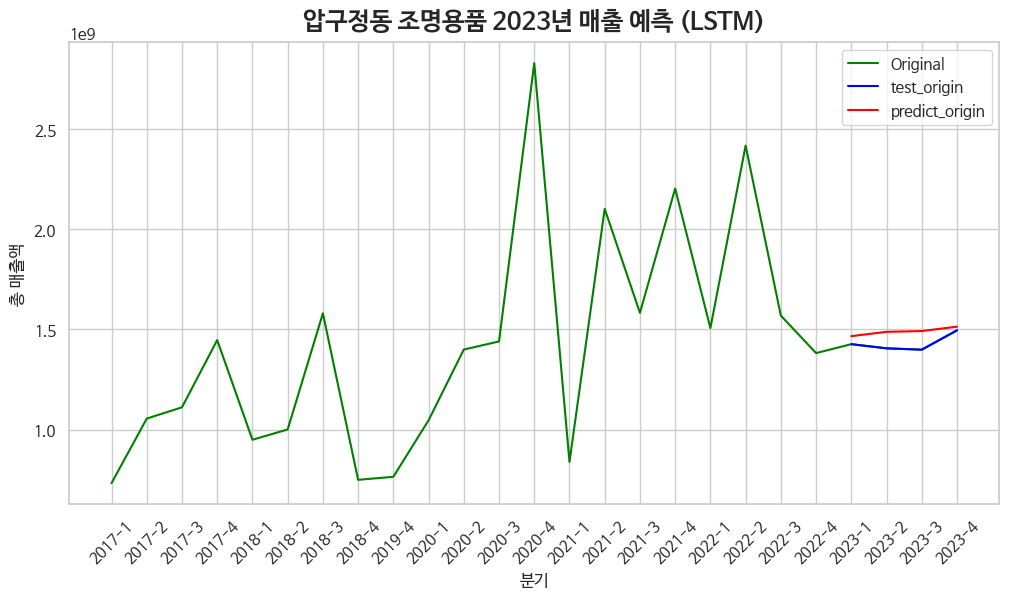

In [233]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))

plt.title('압구정동 조명용품 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)

plt.plot(ap_light['분기'], ap_light['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()